# Práctica 1

## Lucas Hidalgo Herrera

Como, salvo cambios necesarios en los ejercicios, la precisión del ordenador es fija, dejo por aquí cual es dicha precisión:

In [1400]:
import decimal as dec
import importlib
import funciones_utiles as fu
import sympy as sp               #? Estan en funciones_utiles, lo pongo para quitar el subrayado amarillo, aún así funciona
import numpy as np
import matplotlib.pyplot as plt
#importlib.reload(fu)            # Se ha usado sobretodo en la etapa de desarollo del notebook
prec_default=dec.getcontext().prec
prec_default

28

## Ejercicio 1. 
> Teniendo en cuenta la recomendación explicada sobre los criterios de parada, codifica una función similar a la explicada en el método de bisección para el método de la secante.
> 
> Aproxima la raíz de la función $f(x)=e^x-3$:
> * Cambiando la precisión a 5 cifras significativas.
> * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Para poder justificar que el método de la secante converge usaremos lo desarrollado en el notebook de la práctica pues es la misma función. De ahí conocemos que:
- La función es contractiva en todo el intevalo $[1,1.2]$.
- Por el Teorema de Bolzano, la función tiene una solución en ese intervalo.
- La función es inyectiva y su derivada también. 

Cabe destacar que, aunque el notebook se hará de forma general, para el caso que nos concierne sabremos que el denominador del método de la secante nunca se anulará por la inyectividad de la exponencial.

Pasamos ya a programar los métodos necesarios. Se hará el ejercicios tanto en cálculo simbólico como en numérico.

In [1412]:
x=sp.Symbol('x')

def fsym(x):
    '''Version simbolica de la funcion'''
    return sp.exp(x)-3

def fnum(x:float):
    '''Version numerica de la funcion'''
    return np.exp(x)-3

print(fsym(0),fnum(0))
exacta=sp.solve(sp.Eq(sp.exp(x)-3,0))
print("Solucion exacta: ", exacta[0].evalf())


-2 -2.0
Solucion exacta:  1.09861228866811


Veamos ahora que la función secante del módulo funciona correctamente:

In [1402]:
x0,x1=1.2,1.19

ysym = fu.secante(fsym,x0,x1)
ynum = fu.secante(fnum,x0,x1)
print(ysym,ynum)

1.10309974543859 1.1030997454385931


Como se ve, el cálculo simbólico y numérico se diferencian siendo el numérico una aproximación.

Pasamos, ya sí, a aplicar el método de la secante con las semillas elegindas, en este caso $x_0=1.2$ y $x_1=1.19$ obteniendo la aproximación simbólica y numérica.

In [1403]:
solucion_total_sym=fu.metodo_secante(fsym,x0,x1,100,10000) 
solucion_total_num=fu.metodo_secante(fnum,x0,x1,100,10000)

print(solucion_total_sym[-2][-1] , solucion_total_num[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())

1.09861228866811 1.0986122886681096
Solucion exacta:  1.09861228866811


Como se puede ver, la exactitud del cálculo simbólico sale a relucir frente a la aproximación numérica. Sin embargo, ya sabemos que no siempre podemos resolver las ecuaciones de forma exacta, y es aquí donde la fortaleza de la solución numérica sale a relucir.

### Apartado 1
Por el enunciado del ejercicio, debemos cambiar la precisión del ordenador a 5 cifras significativas; para ello, haremos uso de la función *getcontext* del módulo *Decimal*. Además, en la tolerancia del método, impondremos una tolerancia de $10^{-5}$ como máximo error.

In [1404]:
cifras=5
dec.getcontext().prec=5
dec.getcontext()

Context(prec=5, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

Una vez hemos hecho el cambio de precisión, con los valores $x0$ y $x1$ definidos anteriormente procedemos a ejecutar el método de la secante con la tolerancia impuesta por *cifras*.

In [1405]:

solucion_total_sym=fu.metodo_secante(fsym,x0,x1,cifras,100)
solucion_total_num=fu.metodo_secante(fnum,x0,x1,cifras,100)

print(solucion_total_sym[-2][-1],solucion_total_num[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())

1.09861228871375 1.0986122887137495
Solucion exacta:  1.09861228866811


En este caso, podemos ver que la precisión afecta de forma significativa al resultado de la ejecución. Frente a la ejecución anterior que será repetida en el apartado 2, la exactitud de estas soluciones es bastante pobre, como cabía esperar.

### Apartado 2

Para este apartado, vamos a imponer de nuevo la precisión por defecto que guardamos al principio de la práctica y a volver a ejecutar el algoritmo.

In [1406]:
dec.getcontext().prec=prec_default
dec.getcontext()

solucion_total_sym=fu.metodo_secante(fsym,x0,x1,28,10000)
solucion_total_num=fu.metodo_secante(fnum,x0,x1,28,10000)

print(solucion_total_sym[-2][-1],solucion_total_num[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())

1.09861228866811 1.0986122886681096
Solucion exacta:  1.09861228866811


## Ejercicio 2. 
> Teniendo en cuenta estos primeros pasos, codifica una función para el método de Wittaker.
> 
> Aproxima la raíz de la función $f(x)=e^x-3$:
> * Cambiando la precisión a 5 cifras significativas.
> * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.
> 
> Comprueba que una mala elección de $m$ puede provocar que la sucesión no converja.

Siguiendo las características de $f$ vistas en el **ejercicio 1** es fácil ver que, dependiendo del valor de $m$ nuestro método convergerá o no. 

De clase sabemos que, el método de Wittaker no es más que una simplificación del método de Newton-Raphson; por tanto, se limita a trazar rectas que pasan por un punto para después tomar el punto de corte con el eje de abscisas. Es decir, si $m$ no se asemeja a la derivada de la función en el intervalo donde estemos trabajando, podremos caer en no convergencia a la solución. 

Para poder representar esto, he hecho dos gráficas tomando m similar a la derivada y otra tomando $m=1$.


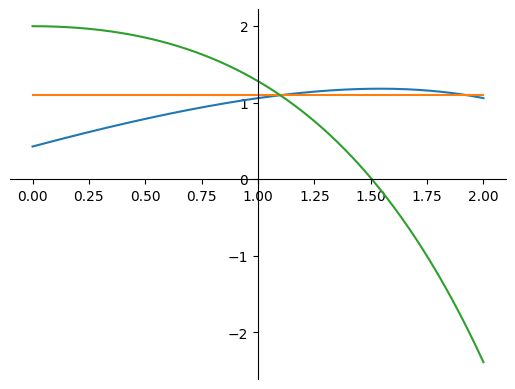

In [1407]:
#TODO: Hacer gráficas que lo muestren
#! Pensar mejor
m=np.exp(2)-np.exp(1)
m_bad=1
num_points = 500
x_values = np.linspace(0,2,num_points)
y_values = fu.wittaker(fnum,x_values,m)
y_values_2= np.full(num_points,np.log(3))
y_values_3= fu.wittaker(fnum,x_values,m_bad)
fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',1))

ax.plot(x_values, y_values)
ax.plot(x_values,y_values_2)
ax.plot(x_values,y_values_3)


Por tanto, pasamos ya a hacer el **método de wittaker** con una toleracia y un máximo de iteraciones para después realizar los apartados del ejercicio. 

COmprobamos previamente que las funciones definidas en el archivo *funciones_utiles* funcionan correctamente.

In [1415]:
m=np.exp(2)-np.exp(1)

solucion_total_sym=fu.metodo_wittaker(fsym,x0,m,28,10)
solucion_total_num=fu.metodo_wittaker(fnum,x0,m,28,10)

print(solucion_total_sym[-2][-1],solucion_total_num[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())

1.09861529635680 1.0986152963567968
Solucion exacta:  1.09861228866811


### Apartado 1
Por el enunciado del ejercicio, debemos cambiar la precisión del ordenador a 5 cifras significativas:

In [1409]:
cifras=5
dec.getcontext().prec=5
dec.getcontext()

Context(prec=5, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

Una vez hemos hecho el cambio de precisión, con el valor $x0$ definido en ejercicios anteriores procedemos a ejecutar el método de wittaker con la tolerancia impuesta por *cifras*.

In [1416]:
solucion_total_sym=fu.metodo_wittaker(fsym,x0,m,5,100000)
solucion_total_num=fu.metodo_wittaker(fnum,x0,m,5,100000)

print(solucion_total_sym[-2][-1],solucion_total_num[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())

1.09861529635680 1.0986152963567968
Solucion exacta:  1.09861228866811


### Apartado 2

Para este apartado, vamos a imponer de nuevo la precisión por defecto que guardamos al principio de la práctica y a volver a ejecutar el algoritmo.

In [1417]:
dec.getcontext().prec=prec_default
dec.getcontext()

solucion_total_sym=fu.metodo_wittaker(fsym,x0,m,28,10000)
solucion_total_num=fu.metodo_wittaker(fnum,x0,m,28,10000)

print(solucion_total_sym[-2][-1],solucion_total_num[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())

1.09861228866811 1.0986122886681098
Solucion exacta:  1.09861228866811


### Apartado Extra
Bastará con un valor de $m$ que no sea parecido a la derivada de la función en el intervalo donde queramos trabajar.

In [1418]:
#m=-0.5
#m=-10
m=1
solucion_total_sym=fu.metodo_wittaker(fsym,x0,m,28,1000)
solucion_total_num=fu.metodo_wittaker(fnum,x0,m,28,1000)

print(solucion_total_sym[-2][-1],solucion_total_num[-2][-1])

1.34440840310886 1.9649718023604046


## Ejercicio 3. 
> Modifique el método anterior para que, en lugar de fijar una pendiente $m$, calcule en cada iteración la derivada de la función en dicho punto, obteniendo el método de Newton-Raphson. Con este método:
> 
> Aproxima la raíz de la función $f(x)=e^x-3$:
> * Cambiando la precisión a 5 cifras significativas.
> * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.
> 
> Compare, en iguales condiciones, el rendimiento de Newton-Raphson con respecto al método de Wittaker.

Primero de todo, cabe destacar que no vamos a probar la convergencia del método de Newton-Raphson en este ejercicio pues no se nos pide. 

Tras esta aclaración, vamos a definir la función derivada para explicar cómo vamso a calcular la derivada de cualquier función siempre y cuanod sea definida con elementos simbólicos.

Una vez definida la función, simplemente debemos calcular su derivada simbólica para después hacer uso de la función *sp.lambdify* que se encargará de pasarla a su variante numérica. Tras esto, podremos evaluar la función en cualquier punto obteniendo así la aproximación numérica que buscamos.

Aunque se haga aquí, no se ha usado esta función derivada en la implementación del algoritmo, pues como pide el ejercicio, en cada iteración se calculará.

In [1422]:

#TODO:Mirar si se prueba la convergencia en otro sitio y si hay que hacerlo?
df_sym=sp.diff(fsym(x),x)
df_num=sp.lambdify(x, df_sym, 'numpy')
print(df_num(0))

1.0


Pasamos a comprobar el funcionamiento de la función *newtonraphson* para ver que es correcto:

In [1423]:
print(fu.newtonraphson(fsym,1.2))

1.1035826357366063


Por último, ejecutamos el método con las precisiones que se nos piden:

In [1424]:
array5=fu.metodo_nr(fsym,x0,5,1000)      #Ejecucion con 5 cifras significativas
arraydef=fu.metodo_nr(fsym,x0,prec_default,1000)
print("Solucion con 5 cifras significativas: ",array5[-2][-1])
print("Solucion con la precision por defecto: ", arraydef[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())


Solucion con 5 cifras significativas:  1.0986122886681098
Solucion con la precision por defecto:  1.0986122886681098
Solucion exacta:  1.09861228866811


### Apartado Extra

Compararemos los métodos en las siguientes condiciones para aprovechar los cálculos ya realizados. Son las siguientes:
- $x_0=1.2$
- $tol=prec\_default$
- $max\_iter=1000$
- $m=f_{num}(2)-f_{num}(1)$

In [1425]:
m=fnum(2)-fnum(1)

arraywit=fu.metodo_wittaker(f,x0,prec_default,1000)

print("Solucion Newton-Raphson: ", arraydef[-2][-1])
print("Solucion Wittaker: ", arraywit[-2][-1])
print("Solucion exacta: ", exacta[0].evalf())

#? Preguntar la veracidad del comentario inferior
#! Vas por el ejercicio 4 salvo salvedades

Solucion Newton-Raphson:  1.0986122886681098
Solucion Wittaker:  1.09861343604369
Solucion exacta:  1.09861228866811


Y como era de esperar, el método de Newton-Raphson es mucho más preciso que el método de Wittaker. No obstante, dependiendo de las cualidades de la función podría darse el caso de que con un buen valor de $m$ el método de Wittaker obtuviera una mejor solución.

## Ejercicio 4.
> Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

Para realizar este ejercicio, deberemos probar que existe una raíz, que es única y obtener la aproximación mediante el método de bisección que se encuentra en el módulo *funciones_utiles*.

Pasamos a definir la función y a usar el **Teorema de Bolzano** para demostrar la existencia de la solución.

In [1426]:
x=sp.Symbol('x')

def f(x):
    return x**3+4*x**2-10

f_num=sp.lambdify(x, f(x), 'numpy')
f_num(0)

-10

In [1427]:
a,b=1,2

existe_raiz=f_num(a)*f_num(b)<0
existe_raiz

True

Por tanto, por el **Teorema de Bolzano** podemos concluir que, en el intervalo $[1,2]$ existe alguna raíz. Para probar la unicidad haremos uso de la librería *matplotlib*; con ella podremos representar la función en el intervalo propuesto y veremos que sólo hay una solución.

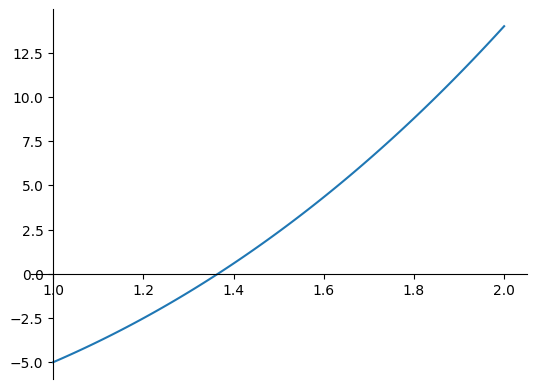

In [1428]:
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = f(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',1))

ax.plot(x_values, y_values)

Por tanto, es fácil ver que la única raíz en ese intervalo se encuentra en el subintervalo $[1.2,1.4]$. Para facilitar los cálculos usaremos este subintervalo a la hora de aplicar el *método de Bisección*:

In [1429]:
exacta = sp.solve(sp.Eq(x**3+4*x**2-10,0),x)

array=fu.biseccion(f_num,1.2,1.4,4)     # Con esta llamada imponemos una tolerancia de 10^{-4}
print(array[-2][-1])
print('Solucion exacta: ', exacta[2].evalf())

1.365234375
Solucion exacta:  1.36523001341410


Para conocer el número de iteraciones mínimo para conseguir una tolerancia de $10^{-5}$ deberemos resolver una inecuación. La inecuación, vista en clase, es la siguiente. Siendo $a$,$b$ los extremos del intervalo se cumple:

$$|e_n|<\frac{b-a}{2^{n+1}}\leq10^{-5}$$

De donde despejando obtenemos que, el mínimo número de iteraciones es:

$$n\geq log_2(\frac{(b-a)\cdot10^5}{2})$$

Donde, para obtener el resultado correcto aplicaremos la función techo, lo cual nos dará el resultado que buscamos.

In [1430]:
iters = np.ceil(np.log((b - a) * 10**5 / 2) / np.log(2))  
print(iters)

16.0


Para poder aplicar el *método de Newton-Raphson* es necesario disponer de una semilla $x0$; sin embargo, esta semilla no puede ser cualquiera sino que deben cumplirse unas condiciones que nos determinarán la semilla a elegir. Para ello, vamos a probar la convergencia del método en el intervalo $[1,2]$ probando el **Teorema de convergencia global de Newton-Raphson**.

Obtendremos la convergencia en todo el intervalo y podremos tomar cualquier punto del intervalo como semilla. En este caso, cabe destacar que no probaremos la condición sobre la existencia de la semilla pues ya se probó para usar el *método de Bisección*.

In [1431]:
#1. Obtener la derivada
df=sp.diff(f(x),x)
df_num=sp.lambdify(x, df, 'numpy')
#2. Obtener la derivada segunda
df_num_2=sp.lambdify(x,sp.diff(df,x),'numpy')

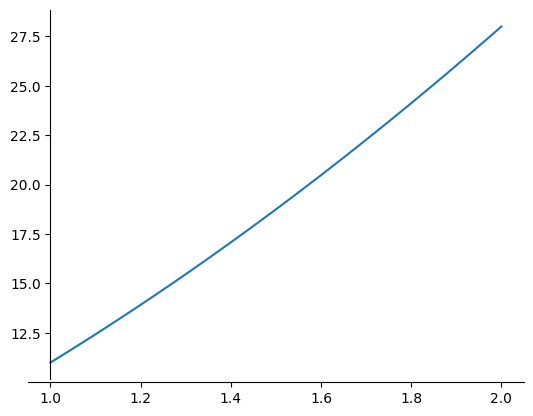

In [1432]:
#3. Estudiar condiciones de las derivadas en el [1,2]
#Pintamos la derivada
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = df_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',10))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',1))

ax.plot(x_values, y_values)

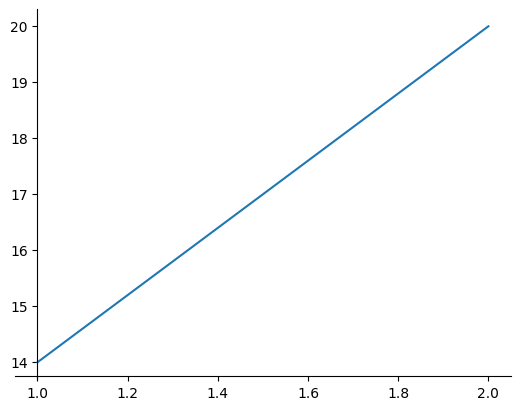

In [1433]:
# Pintamos la segunda derivada
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = df_num_2(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',13.75))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',1))

ax.plot(x_values, y_values)

Como se cumple el teorema podemos aplicar newtonraphson cuando lo tenga hecho

In [1434]:
condition=max(abs(f_num(a)/df_num(a)),abs(f_num(b)/df_num(b)))<(b-a)
condition

True

Por tanto, estamos en condiciones de aplicar el *método de Newton-Raphson* con cualquier punto del intervalo, por ejemplo, elegimos $x_0=1.5$.

In [1435]:
#Aplicamos NR
x0=1.5  # Semilla

array=fu.metodo_nr(f,x0,3,10000)

print(array[-2][-1])
print('Solucion exacta: ', exacta[2].evalf()) 

1.3652300139161466
Solucion exacta:  1.36523001341410


## Ejercicio 5
>Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.
> 
> 1. $3x=2+x^2-e^x$.
> 
> 2. $x^2+10 \cos x+x=0$.

Al igual que debimos hacer en el ejercicio anterior, aplicaremos el **Teorema de convergencia global de Newton-Raphson** sobre ciertos intervalos que contengan una única solución. En caso de que no se cumpla la última de las condiciones del teorema, buscaremos una semilla que cumpla el **Teorema de convergencia local de Newton-Raphson** cuya condición es:
$$f(x_0)f^{''}(x_0)>0$$

En esas condiciones podremos aplicar el método y obtener la aproximación.

In [1436]:
x=sp.Symbol('x')
def f(x):
    return sp.exp(x)-x**2+3*x-2

def g(x):
    return x**2+10*sp.cos(x)+x


f_num=sp.lambdify(x,f(x),'numpy')
g_num=sp.lambdify(x,g(x),'numpy')

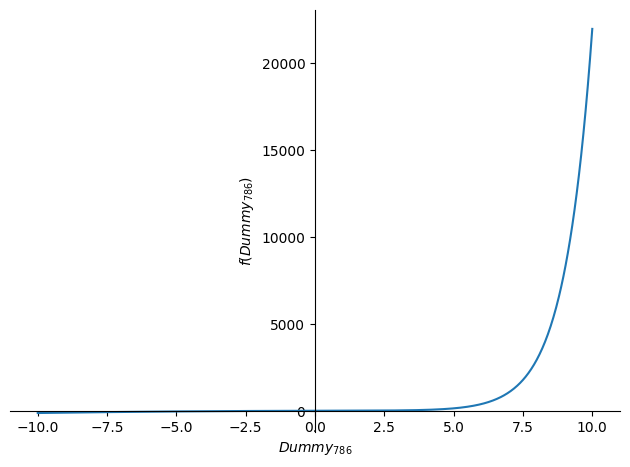

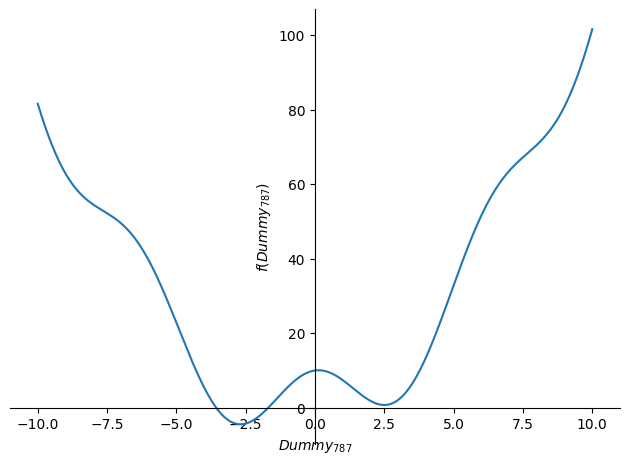

In [1437]:
sp.plot(f)
sp.plot(g)

De las gráficas se puede ver que la función $f$ dispone de una única solución que podría estar en el intervalo $[-2.5,2.5]$; no obstante, tras sucesivas gráficas hemos acotado el intervalo a uno de longitud unitaria, el subintervalo $[-0.5,0.5]$. 

Por su parte, la función $g$ dispone de dos raíces que se encuentra en los intervalos $[-5,-2.5]$ y $[-2.5,0]$ respectivamente. Al igual que antes, hemos tratado de encontrar intervalos de menor longitud. Más adelante comentaremos qué intervalos hemos deducido.

Comenzamos con la aproximación de la raíz de $f$.

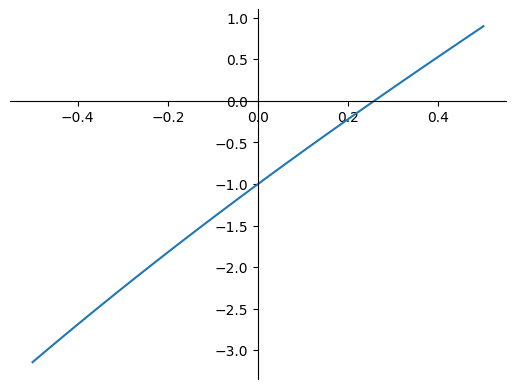

In [1438]:
a,b=-0.5,0.5
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = f_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(x_values, y_values)

Como ya hemos dicho antes, esta raíz se ve claramente que se encuentra en el intervalo $[-0.5,0.5]$. Podríamos estudiar el intervalo $[0,0.5]$ pero con el propuesto ya obtenemos convergencia en cualquier punto del intervalo.

Pasamos ya a comprobar las hipótesis del **Teorema de convergencia global**.

In [1439]:
dff=sp.diff(f(x),x)
dff2=sp.diff(dff,x)

dff_num=sp.lambdify(x,dff,'numpy')
dff2_num=sp.lambdify(x,dff2,'numpy')

In [1440]:
# 1. Probamos bolzano
cond1=f_num(a)*f_num(b)<0
print(cond1)

True


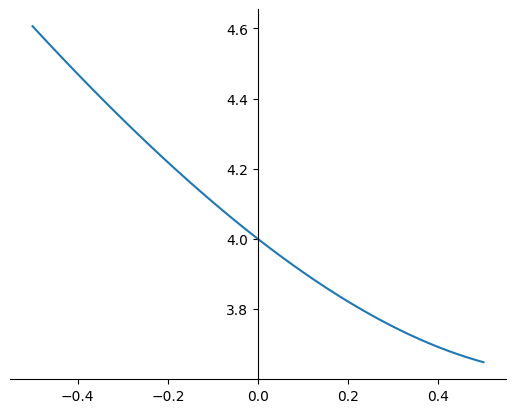

In [1441]:
#2. Probamos las condiciones sobre las derivadas
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = dff_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',3.6))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(x_values, y_values)

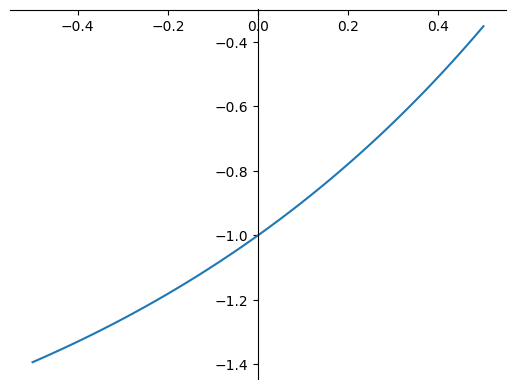

In [1442]:
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = dff2_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',-0.3))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(x_values, y_values)

In [1443]:
#3. Condicion del máximo
cond2=max(abs(f_num(a)/dff_num(a)),abs(f_num(b)/dff_num(b)))<(b-a)
print(cond2)

True


Por tanto, podemos concluir que tendremos convergencia del método tomando cualquier punto del intervalo de estudio como semilla. Tomamos, por ejemplo, el punto $x_0=0.5$.

In [1444]:
array=fu.metodo_nr(f,0,5,1000)
print(array[-2][-1])

0.25753028543719547


Hacemos exactamente lo mismo con la función $g$.

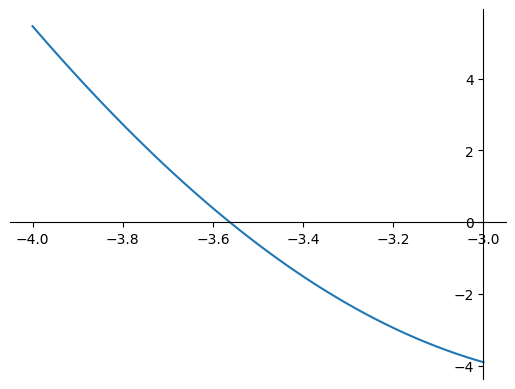

In [1445]:
a,b=-4,-3
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = g_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-3))

ax.plot(x_values, y_values)

Como ya se ha dicho durante la realización del ejercicio, podemos tomar el intervalo $[-4,-3]$ y aplicar de nuevo el **Teorema de convergencia global de Newton-Raphson**.

In [1446]:
dfg=sp.diff(g(x),x)
dfg2=sp.diff(dfg,x)

dfg_num=sp.lambdify(x,dfg,'numpy')
dfg2_num=sp.lambdify(x,dfg2,'numpy')

In [1447]:
# 1. Probamos bolzano
cond1=g_num(a)*g_num(b)<0
print(cond1)

True


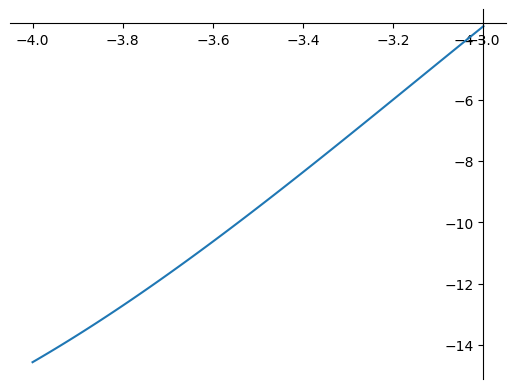

In [1376]:
#2. Probamos las condiciones sobre las derivadas
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = dfg_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',-3.5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-3))

ax.plot(x_values, y_values)

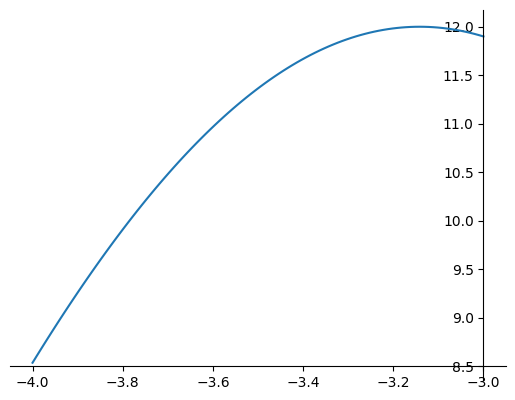

In [1377]:
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = dfg2_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',8.5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-3))

ax.plot(x_values, y_values)

In [1378]:
#3. Condicion del máximo
print(max(abs(g_num(a)/dfg_num(a)),abs(g_num(b)/dfg_num(b)))<(b-a))


False


Por tanto, debemos tratar de probar el **Teorema de convergencia local de Newton-Raphson**, para ello, podemos usar la gráfica de $g$ y de su segunda derivada para concluir que el teorema es válido con cualquier punto del intervalo $[-4,-3.6]$ pues la función, ahí, es positiva. 

Por ejemplo, elegimos $x_0=-3.75$.

In [1379]:
#3.1.Probamos con la relajacion del teorema
print(g_num(-3.75)*dfg2_num(-3.75)>0)


True


In [1448]:
array=fu.metodo_nr(g,-3.75,5,1000)
print(array[-2][-1])

-3.5623314972364053


Esta vez, ya sin parones, aplicamos el mismo proceso sobre el intervalo $[-2,-1.4]$.

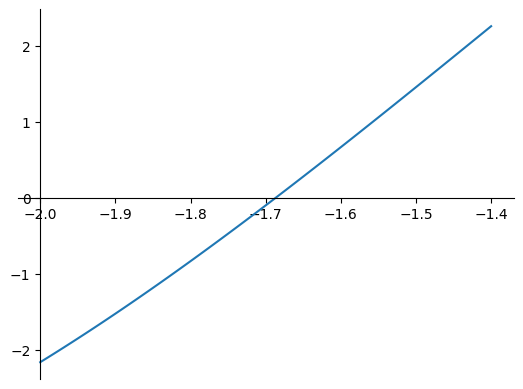

In [1381]:
a,b=-2,-1.4
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = g_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-2))

ax.plot(x_values, y_values)

In [1382]:
#1. Probamos Bolzano
cond1=g_num(a)*g_num(b)<0
print(cond1)

True


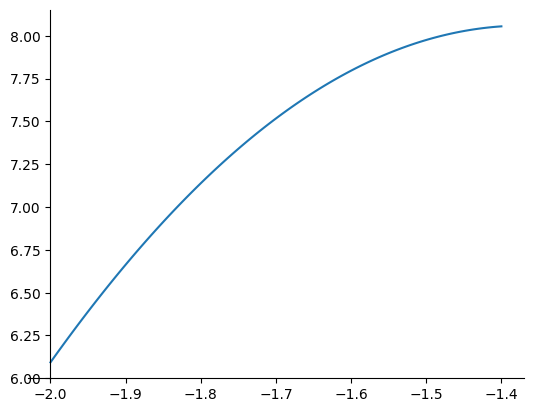

In [1383]:
#2. Probamos las condiciones sobre las derivadas
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = dfg_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',6))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-2))

ax.plot(x_values, y_values)

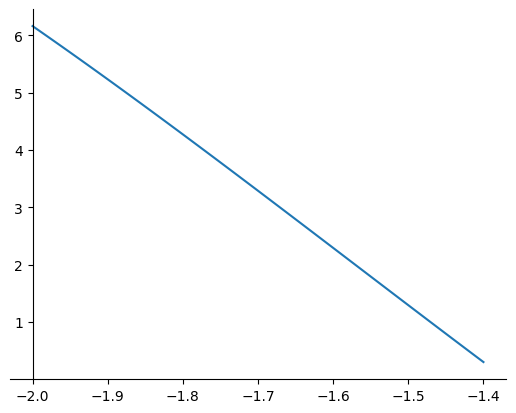

In [1384]:
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = dfg2_num(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-2))

ax.plot(x_values, y_values)

In [1385]:
#3. Condicion del máximo
cond2=max(abs(g_num(a)/dfg_num(a)),abs(g_num(b)/dfg_num(b)))<(b-a)
print(cond2)

True


In [1449]:
array=fu.metodo_nr(g,-2,5,1000)
print(array[-2][-1])

-1.68693989979924


## Ejercicio 6
> Para la función  $ f(x)= 3 x^2+e^x-1$,
> 
> i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;
> 
> ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.

En este ejercicio, nos limitaremos a aplicar los métodos que nos piden asumiendo la convergencia de los mismos.

In [1450]:
#? Tengo que probar la convergencia?
x=sp.Symbol('x')

def f(x):
    return 3*x**2+sp.exp(x)-1

fnum=sp.lambdify(x,f(x),'numpy')

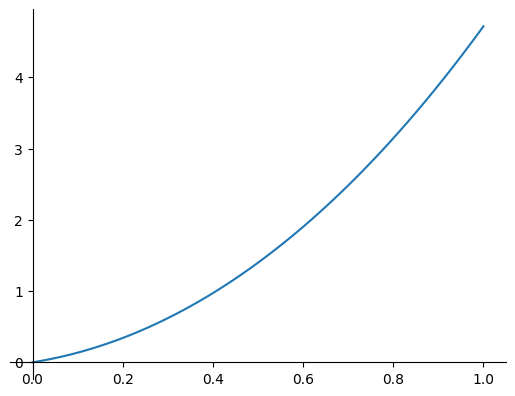

In [1388]:
num_points = 100
x_values = np.linspace(0,1,num_points)
y_values = fnum(x_values)

fig,ax = plt.subplots()
ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(x_values, y_values)

### Apartado 1

Haciendo uso de la gráfica de la función, queda ya claro que el *método de Bisección* no podrá converger pues no se cumple el **Teorema de Bolzano** en el intervalo $[0,1]$.

In [1451]:
array=fu.biseccion(fnum,0,1,4,100000)
print(array[-2][-1])

0.99993896484375


### Apartado 2

A diferencia del apartado anterior, sí se que se cumple el **Teorema de convergencia local de Newton-Raphson** para la semilla $x_0=0$, luego el método convergerá.

In [1452]:
array=fu.metodo_nr(f,0,4,1000000)
print(array[-2][-1])

0.0


## Ejercicio 7
> Implemente el método de iteración funcional de Steffensen para una función $f$. En particular, para la función $f(x)=e^x-3$:
> * Represente gráficamente las funciones $g$ definidas tanto para el método de Newton-Raphson como para el método de Steffensen, comprobando que ambas poseen un punto fijo en la raíz de $f$.
> * Aproxima su única raíz utilizando el método de Steffensen:
>     * Cambiando la precisión a 5 cifras significativas.
>     * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Para ver que las funciones tienen un punto fijo en la raíz de la ecuación, sabiendo que la raíz es $ln(3)$, las funciones recien definidas deberán cortar a la recta $y=x$ en el punto $y=ln(3)$. 

Este razonamiento es el que se realiza en la celda inferior.

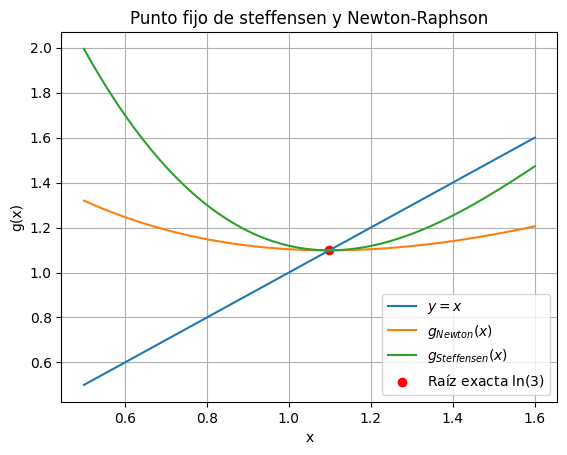

In [1453]:
f = lambda x: np.exp(x) - 3
df = lambda x: np.exp(x)

# g(x) para Newton-Raphson
g_newton = lambda x: x - f(x) / df(x)

# g(x) para Steffensen
g_steff = lambda x: x - (f(x)**2) / (f(x + f(x)) - f(x))

x_vals = np.linspace(0.5, 1.6, 500)
y_identity = x_vals
y_newton = g_newton(x_vals)
y_steff = g_steff(x_vals)

plt.figure()
plt.plot(x_vals, y_identity, label="$y = x$")
plt.plot(x_vals, y_newton, label="$g_{Newton}(x)$")
plt.plot(x_vals, y_steff, label="$g_{Steffensen}(x)$")

plt.scatter([np.log(3)], [np.log(3)], color="red", label="Raíz exacta $\\ln(3)$")

plt.title("Punto fijo de steffensen y Newton-Raphson")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.show()

Una vez probado que está el punto fijo, usaremos el *método de Steffensen* para probar la convergencia a la solución de la ecuación.

In [1454]:
array=fu.metodo_steffensen(f,1)
print(array[-2][-1])
print('Solucion exacta: ', np.log(3))

1.0986122886681096
Solucion exacta:  1.0986122886681098


Por tanto, vemos que el método implementado en el módulo *funciones_utiles* es correcto. Pasamos a hacer la comprobación que pide el ejercicio.

In [1455]:
#! Algo pasa con el de 5 cifras
array_prec5=fu.metodo_steffensen(f,1,5)
array_max_prec=fu.metodo_steffensen(f,1,prec_default)
print("Solucion con 5 cifras exactas: ",array_prec5[-2][-1] )
print('Solucion con precision por defecto: ',array_max_prec[-2][-1] )
print('Solucion exacta: ', np.log(3))

Solucion con 5 cifras exactas:  1.0986122886716747
Solucion con precision por defecto:  1.0986122886681096
Solucion exacta:  1.0986122886681098


## Ejercicio 8
>Implemente el método de aceleración de la convergencia de Steffensen y aplíquelo a una sucesión de valores obtenidos mediante iteración funcional de Newton-Raphson a la función $f(x) = e^x -3$. Compare las aproximaciones tras 4 iteraciones del método de Newton-Raphson, aceleración de la convergencia de Aitken y aceleración de la convergencia de Steffensen.

In [1456]:
x=sp.Symbol('x')

def f(x):
    return sp.exp(x)-3

Como ya vimos en ejercicios anteriores, podemos aplicar el *método de Newton-Rapshon* en cualquier punto del intervalo $[1,1.2]$ luego podemos tomar la semilla $x_0=1$. Usaremos esta semilla para todas las ejecuciones del ejercicio obteniendo así una comparación fiable. 

In [1457]:
fu.newton_steffensen(f,1)

([1,
  np.float64(1.098856228284993),
  np.float64(1.098612288664481),
  np.float64(1.0986122886681096),
  np.float64(1.0986122886681096)],
 4)

Podemos ver que, el *método de aceleración de Steffensen* funciona.

In [1459]:
a=fu.metodo_nr(f,1,28,100)
b=fu.aitken_accelerator(a[-2])
print(b[-1])

1.0986122886681096


Por su parte, también funciona el *método de aceleración de Aitken*.

Para realizar la comparación, imponemos los valores que tomarán todas las ejecuciones:
- $x_0=1$
- $tol=28$, lo cual induce una precisión de 28 cifras significativas.
- $max\_ iter=4$, es una condición impuesta por el ejercicio.

In [1460]:
n_r=fu.metodo_nr(f,1,28,4)
aitken=fu.aitken_accelerator(n_r[-2])
steffensen=fu.newton_steffensen(f,1,28,4)
print(n_r[-2][-1],aitken[-1],steffensen[-2][-1])
print('Solucion exacta: ', np.log(3))

1.0986122886681096 1.0986122886681093 1.0986122886681096
Solucion exacta:  1.0986122886681098


De dicha ejecución podemos notar que, tanto el *método de Newton-Raphson* como el *método de aceleración de Steffensen* coinciden. Sin embargo, el *método de aceleración de Aitken* difiere en el último decimal poduciendo un ligero empeoramiento de la aproximación.

## Ejericicio 9
>Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):
> 
> i) $f(x)=x^7-x^4+2$ ,
> 
> ii) $f(x)=x^7+\cos  x-3$.

Para el primer apartado, simplemente aplicaremos la función *roots* de *numpy* para obtener las raíces complejas de un polinomio.

In [1461]:
coefs=[1,0,0,-1,0,0,0,2]
np.roots(coefs)

array([ 1.06110281+0.37638405j,  1.06110281-0.37638405j,
        0.15199934+1.01945595j,  0.15199934-1.01945595j,
       -0.71310215+0.98823189j, -0.71310215-0.98823189j,
       -1.        +0.j        ])

Explicación del segundo apartado.

In [1462]:
#? Esto realmente vale?
x=sp.Symbol('x')

eq=sp.Eq(x**7-sp.cos(x)-3,0)

sols = sp.solveset(eq,x,sp.S.Reals)

sols

ConditionSet(x, Eq(x**7 - cos(x) - 3, 0), Reals)

## Ejercicio 10 
> De los métodos implementados en los anteriores ejercicios, utiliza el método o métodos numéricos que desees para aproximar la primera raíz de la función
> $$
> f:[0,1]\longrightarrow\mathbb R \\
> f(x) = x(1-x)\sin\left(\dfrac{2\pi}{x+1/10}\right)
> $$
> que sea mayor que una milésima con una precisión de 28 cifras significativas y utilizando el menor número de iteraciones posible. Imprime por pantalla tu aproximación y el número de iteraciones utilizado.